In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

import acquire

# Goal: Find the main demographic driver for Telco churn.

<u> Demographics I'll be looking at:</u>

- Senior citizens
- Single customers
- Customers with Partners
- Customers with Dependants
- Customers with Partner & Dependants

<u> Subgroups to compare once main driver is found, if I want to get more specific: </u>
- Gender
- monthly charges
- tenure

### Notes: By looking at the above demographics I want to find:
1) Highest churned demographic group (of the above)
- Note: I will first need to look at the group as whole (all churned and which group had most churns)
- Note: Then I should consider churn rate based with each group (example: senior citizens that have and have not churned rate)

# Getting to know my data:

In [2]:
#I am using the excel version as it was easier to acquire from my computer
df= acquire.excel_file()
#looking at columns as there seems to be alot
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_auto',
       'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_internet', 'partner_dependants', 'calculated_monthly_avg',
       'validate', 'phone_service_type', 'internet_service_type',
       'contract_type.1', 'rounded_tenure', 'service_type', 'tenure_bins'],
      dtype='object')

In [3]:
#checking out dytpes
df.dtypes

customer_id                object
gender                     object
is_senior_citizen         float64
partner                    object
dependents                 object
phone_service             float64
internet_service          float64
contract_type             float64
payment_type               object
monthly_charges           float64
total_charges             float64
churn                      object
tenure                    float64
is_auto                     int64
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_internet           bool
partner_dependants          int64
calculated_monthly_avg     object
validate                   object
phone_service_type         object
internet_service_type      object
contract_type.1            object
rounded_tenure              int64
service_type               object
tenure_bins                object
dtype: object

<b><u>Takeaways:</b></u>
- I can already see that later down the road, I am going to want to change certain columns from object to float or bool so that I can have numbers to work with in my models those A or B/Yes or No columns
- I know my target (y) will be churn...again, after exploring, I want to change that to a bool

In [4]:
#it looks like I will want to fillna the the total_charges. Because it is a total charge, I am going to use mean (or average) of the total charges to fill those in.
df.isnull().sum()

customer_id                0
gender                     0
is_senior_citizen          0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_auto                    0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_internet         0
partner_dependants         0
calculated_monthly_avg     0
validate                   0
phone_service_type         0
internet_service_type      0
contract_type.1            0
rounded_tenure             0
service_type               0
tenure_bins                0
dtype: int64

In [5]:
#let's fill in those NaNs
total_mean=df.total_charges.mean()
df['total_charges'].fillna(value=total_mean, inplace=True)

df.isnull().sum()

customer_id               0
gender                    0
is_senior_citizen         0
partner                   0
dependents                0
phone_service             0
internet_service          0
contract_type             0
payment_type              0
monthly_charges           0
total_charges             0
churn                     0
tenure                    0
is_auto                   0
is_female                 0
has_churned               0
has_phone                 0
has_internet              0
has_phone_internet        0
partner_dependants        0
calculated_monthly_avg    0
validate                  0
phone_service_type        0
internet_service_type     0
contract_type.1           0
rounded_tenure            0
service_type              0
tenure_bins               0
dtype: int64

In [6]:
#for senior citizen demographics: 
df.is_senior_citizen.value_counts()

#TAKE AWAYS: Senior-citizens customers make up 19% of Telco customers
           # 59 or younger customers make up 81% of Telco customers

0.0    5907
1.0    1142
Name: is_senior_citizen, dtype: int64

In [7]:
#for clients with partner and/or dependants demographics: 
#note: 0= single |  3= has partner AND dependants | 2= has dependants  | 1= has partner
df.partner_dependants.value_counts()

#Takeaways: Singles represent 47% of Telco customers
          # Families represent 25% of Telco customers
          # Parteners represent 23% of Telco customers
          # Single parents represent 5% of Telco customers

0    3281
3    1754
1    1653
2     361
Name: partner_dependants, dtype: int64

In [8]:
#for gender demographics:
df.gender.value_counts()

#Takeaways: Males represent 50% of Telco customers
          # Females represent 50% of Telco customers

Male      3558
Female    3491
Name: gender, dtype: int64

In [9]:
#Let's look at the charts for these demographic customers:
##specifically high percentage groups: 59 or younger | Singles | (and maybe compare to gender?)

## Questions I'm thinking:
-  What do I think my drivers are? 
-  Why?
-  How can I look in/prove that?
-  Are there needed subgroups that I can use later on?
-  What can I get rid of?

Q: What/WHO do I think my drivers are?
- I know from the past that <b>non-automated accounts </b>were a major part of the churn, but I never found out WHO these people were.

#### <u>I want to know:</u>
- Their age, gender, and relationship status [get to know our churns and the probability of a certain demographic leaving]

Q: <i>Why would they churn?</i>
- Is it due only to their non-automated accounts or is there another reason within who they are?

Q: <i>How could I look at this?</i>
- Categorically: churn vs. demographic cateogries w/ chi2 tests and t-tests
- Visually: graphs, charts and accuracy rates in model

Q: <i>What subgroups do I think I will need to help me test churn and demographics?</i>
  - monthly charges (if I find a driver, I'd like to see a possible why within $$ the pay, their account types, etc)

## Next Steps:
- ✅ Creating range columns (for upcoming hypothesis testing) 
- ✅ PreProcessing Data (encoding any needed data)
- ✅ Prepping and splitting data to Explore and later Train on
- Changing objects to floats for hypothesis testing
- ✅ Explore some charts of the data (histograms comparing demographics)

In [10]:
#creating the columns for range in the statistical table of df
##used this great function from Faith Kane
def col_range(df):
    stats_df = df.describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    return stats_df

In [11]:
col_range(df)

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.000000,0.000000,0.000000,1.000000,1.000000
phone_service,7049.0,1.324585,0.642709,0.00,1.000000,1.000000,2.000000,2.000000,2.000000
internet_service,7049.0,1.222585,0.779068,0.00,1.000000,1.000000,2.000000,2.000000,2.000000
contract_type,7049.0,0.690878,0.833757,0.00,0.000000,0.000000,1.000000,2.000000,2.000000
monthly_charges,7049.0,64.747014,30.099460,18.25,35.450000,70.350000,89.850000,118.750000,100.500000
total_charges,7049.0,2283.043883,2264.752583,18.80,402.500000,1400.300000,3784.000000,8684.800000,8666.000000
tenure,7049.0,32.379866,24.595524,0.00,8.733456,28.683425,55.229399,79.341772,79.341772
is_auto,7049.0,0.435806,0.495897,0.00,0.000000,0.000000,1.000000,1.000000,1.000000
partner_dependants,7049.0,1.083416,1.226883,0.00,0.000000,1.000000,2.000000,3.000000,3.000000
rounded_tenure,7049.0,32.374805,24.596637,0.00,9.000000,29.000000,55.000000,79.000000,79.000000


## Preparing Data:

In [12]:
# Preparing and Seperating the Data:
#- Separating the split data to begin exploration and hypothesis testing
##note: this will be added to the prepare.py file
def telco_split(df):
    '''
    This function takes in Telco data from the acquire.py file,
    performs a split and stratifies on churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [13]:
##note: this will be added to the prepare.py file
def prep_telco(df):
    '''
    This function takes in the Telco df(via acquire.py).
    It drops the species_id column and renames species_name to species, 
    Performs a 3-way split stratified on churn, and
    Returns train, validate, and test dataframes.
    '''
    # drop and rename columns
    df = df.drop(columns='customer_id').rename(columns={'has_churned': 'Churned_Customers'})
    
    # split dataframe into train, validate, and test
    train, validate, test = telco_split(df)
    
    return train, validate, test

In [14]:
train, validate, test = prep_telco(df)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3947, 27)
validate -> (1692, 27)
test -> (1410, 27)


## Hypothesis & Charts Exploration:
I want to take some time to explore the relationships between churn and the Telco demographics. 
I'll be using ChiSquare, as this Hypothesis test works well with two categorical values. 
I also will be using barplots to visually show these relations...if any. :)

## Churn vs. Partnerships 

In [15]:
#Calculating ChiSquare of categorical demographics (churn + partner_dependants)
n = train.shape[0]

churn_proportions = train.churn.value_counts() / n
churn_proportions

No     0.734735
Yes    0.265265
Name: churn, dtype: float64

In [16]:
partner_proportions = train.partner_dependants.value_counts() / n
partner_proportions

0    0.458829
3    0.255384
1    0.234102
2    0.051685
Name: partner_dependants, dtype: float64

In [17]:
#creating a function for the expected value to include in ChiSquare
expected = pd.DataFrame()

for churn_group, t_prop in churn_proportions.iteritems():
    for partner_group, d_prop in partner_proportions.iteritems():
        expected.loc[partner_group, churn_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected

,No,Yes
0,0.337118,0.121711
1,0.172003,0.062099
2,0.037975,0.013710
3,0.187640,0.067744


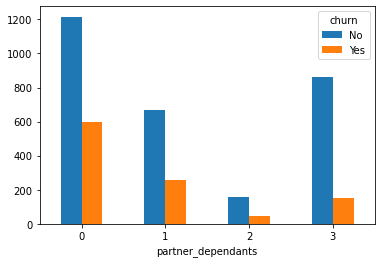

In [19]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

In [50]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to partnerships of customers
# Alternative hypothesis: there is a relationship between churn rate and partnerships of customers
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner_dependants)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that partnership and churn are independent")

The p-value is 3.9152166914300486e-24
Sufficient evidence is present to reject the null hypothesis


### Take Aways:
Percentage of churns per partnership/relationship category:
- <b>Single customers: 33% churned</b>
- Partnered customers: 28% churned
- Single Parent customers: 22% churned
- Family plan customers: 15% churned

Single customers are more likely to churn than any other relationship demographics.

##########################################################################

## Churn vs. Gender:

In [42]:
#Calculating ChiSquare of categorical demographics (churn + gender)
n = train.shape[0]

churn_proportions = train.churn.value_counts() / n
churn_proportions

No     0.734735
Yes    0.265265
Name: churn, dtype: float64

In [43]:
gender_proportions = train.gender.value_counts() / n
gender_proportions

Male      0.509754
Female    0.490246
Name: gender, dtype: float64

In [44]:
expected = pd.DataFrame()

for churn_group, t_prop in churn_proportions.iteritems():
    for gender_group, g_prop in gender_proportions.iteritems():
        expected.loc[gender_group, churn_group] = t_prop * g_prop

expected.sort_index(inplace=True)
expected

,No,Yes
Female,0.360201,0.130045
Male,0.374534,0.135220


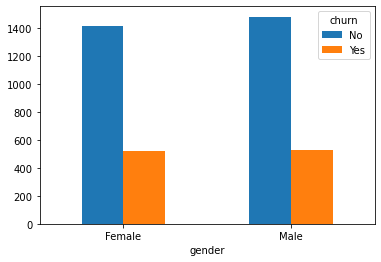

In [48]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

In [40]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to gender
# Alternative hypothesis: there is a relationship between churn rate and gender
alpha = 0.05
observed = pd.crosstab(train.churn, train.gender)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that gender and churn are independent")

The p-value is 0.7612557822850128
Insufficient evidence to reject the null
Evidence seems to support the claim that gender and churn are independent


### Take Aways:
Both Genders churned at almost the same rate within their own categories:
- <b>Female customers: 27% churned</b>
- Male customers: 26% churned

##########################################################################

## Churn vs. Is Senior Citizen?

In [25]:
#Calculating ChiSquare of categorical demographics (churn + is_senior_citizen)
n = train.shape[0]

churn_proportions = train.churn.value_counts() / n
churn_proportions

No     0.734735
Yes    0.265265
Name: churn, dtype: float64

In [26]:
age_proportions = train.is_senior_citizen.value_counts() / n
age_proportions

0.0    0.841905
1.0    0.158095
Name: is_senior_citizen, dtype: float64

In [27]:
expected = pd.DataFrame()

for churn_group, t_prop in churn_proportions.iteritems():
    for age_group, g_prop in age_proportions.iteritems():
        expected.loc[age_group, churn_group] = t_prop * g_prop

expected.sort_index(inplace=True)
expected

,No,Yes
0.0,0.618577,0.223328
1.0,0.116158,0.041937


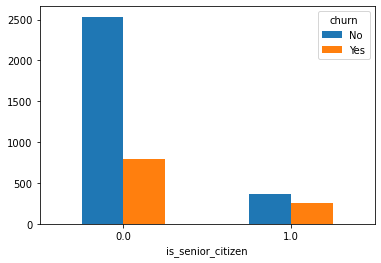

In [29]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

In [38]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to senior citizen customers
# Alternative hypothesis: there is a relationship between churn rate and senior citizens
alpha = 0.05
observed = pd.crosstab(train.churn, train.is_senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that smoking status and day are independent")

The p-value is 9.950129712000579e-20
Sufficient evidence is present to reject the null hypothesis


### Take Aways:
From first glance, because of the low amount of Senior Citizen data count, it looks like customers 59 and younger have more churns. By numbers, YES, 59 and younger DO have more churns. By churn rate based on its own category, Senior Citizens have the highest churn rate.
- <b>Senior Citizens: 41% churned</b>
- 59 and younger customers: 24% churned

As the p-value shows, in the case that the null Hypothesis is that churn and is_senior_citizen as NO relation,
We would reject the nully Hypothesis as they clearly relate. 

##########################################################################

In [ ]:
#________________________________________________________________
#trying shit:
